In [1]:
import requests as re
from bs4 import BeautifulSoup as bs
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

## In the code cell below we can compare 2 stories by Edgar Allan Poe in terms of their effectiveness in inducing the sense of fear, using a distant reading technique.

## We have collected 300 "scary" words and divided them into: 

## 1. Descriptive/graphic words, like "corpse", "nightmarish" and "ghastly"

## 2. Words about the setting, like "night", "winter", "dark"

## After checking how many of these words appear in each story, we will be able to demonstrate which story is scariest than the other.

Paste a link to a story using this page: https://www.telelib.com/authors/P/PoeEdgarAllan/prose/raven_2/ 
or type 'exit' to quit and view the results
https://www.telelib.com/authors/P/PoeEdgarAllan/prose/raven_2/fallhouseusher.html
None None None
https://www.telelib.com/authors/P/PoeEdgarAllan/prose/raven_2/blackcat.html
None None None
Done!


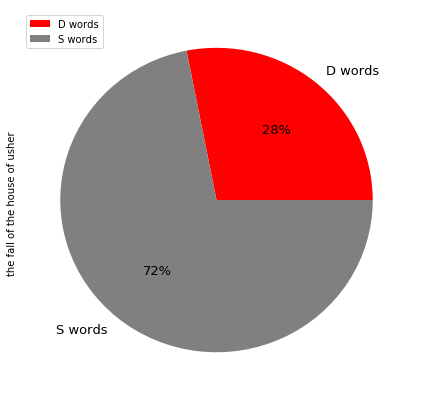

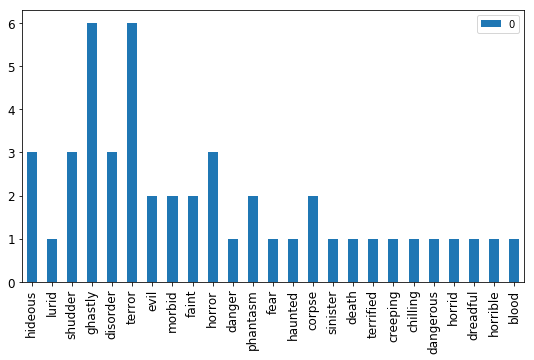

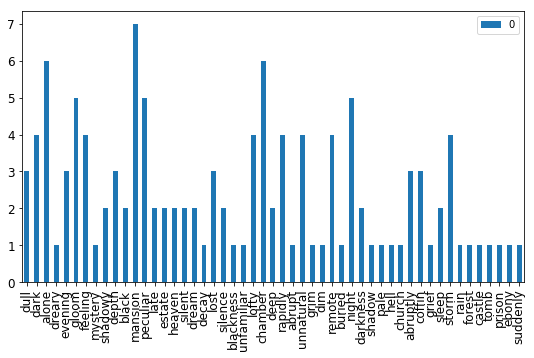

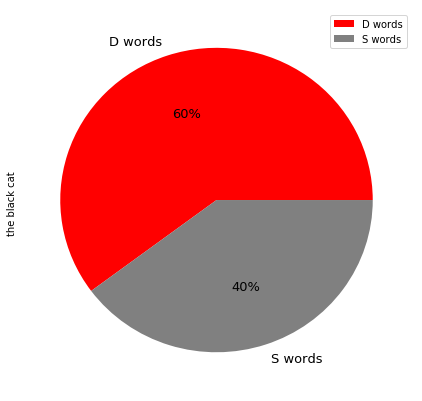

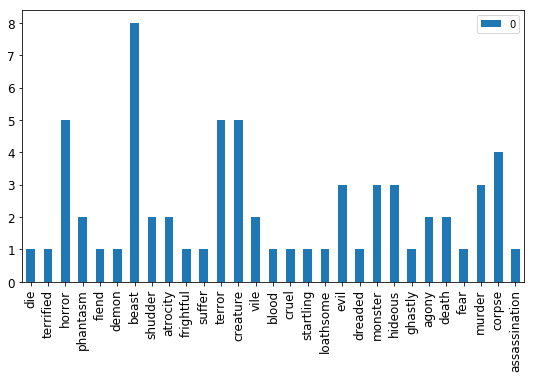

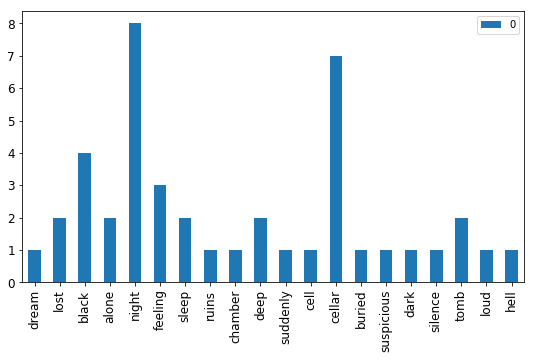

In [2]:
print("Paste a link to a story using this page: https://www.telelib.com/authors/P/PoeEdgarAllan/prose/raven_2/", 
    "\nor type 'exit' to quit and view the results")


### This is the beginning of a loop that asks the user for input. It runs until the counter reaches 0.
count = 2
while True:
    if count == 0:
        break
    inp = input() 
    if inp == 'exit':
        break
    
    
    ### HTML parsing and text cleaning.
    url = re.get(inp)
    content = url.content
    bc = bs(content, 'html.parser')
    l = []
    for i in bc.find_all('div'):
        clean = i.text
        l.append(clean)
    tx = str(l)
    story = tx.replace('\\r', ' ').replace('“', '').replace('?', '').replace('”', '').replace("'", '').replace('\\n',
           ' ').replace(',', '').replace('.', '').replace('—', ' ').replace(';', '').replace('(', 
           '').replace(')','').replace(':', '').replace('\xa0', '').replace('\\xa0', '').lower()
    
    
    ### All stories share the same heading before the title. We only need the title.
    storynamestart = story.find('edition') + 8
    storynameend = story.find('1')
    
    # These 2 stories are problematic, but this does the job.
    if inp == 'https://www.telelib.com/authors/P/PoeEdgarAllan/short_story/reddeath.html':
        storyname = 'the masque of the red death'
    elif inp == 'https://www.telelib.com/authors/P/PoeEdgarAllan/short_story/amontillado.html':
        storyname = 'the cask of amontillado'
    else:
        storyname = story[storynamestart:storynameend]
        
    firstpoe = story.find('poe')
    storybeginning = story.find('poe', firstpoe +1)
    storybeginning = story.find(' ', storybeginning)
    storyend = len("the works of edgar allan poe – volume 2 of the raven edition  back|words home|ea poe home|site info]'") - 1
    story = story[storybeginning: -storyend]
    storywords = nltk.word_tokenize(story)
    
    
    ### Firstly, we read our D words and create the 'storydata1' dictionary that contains those D words that also
    ### appear in our story.
    d = []
    f = open('dwords.txt')
    for w in f:
        w = w.rstrip()
        w = w.lower()
        d.append(w)
    dd = {}
    story1 = [i for i in storywords if i in d]
    for o in story1:
        dd[o] = dd.get(o, 0)+1
    storydata1 = {}
    for r in dd:
      #  if dd[r] > 1 :
            storydata1[r] =  dd[r]
            
         
    ### Then, we do the same for the S words.
    s = []
    y = open('swords.txt')
    for t in y:
        t = t.rstrip()
        t = t.lower()
        s.append(t)
    ss = {}
    story2 = [z for z in storywords if z in s]
    for l in story2:
        ss[l] = ss.get(l, 0)+1
    storydata2 = {}
    for k in ss:
      #  if ss[k] > 1:
            storydata2[k] =  ss[k]       
   

    ### Here, we count the instances for each D and S word and put them in the 'll' dictionary.
    dnumber = sum(value for value in storydata1.values())
    snumber = sum(value for value in storydata2.values())
    ll = {'D words': dnumber, 'S words': snumber}
    
    
    ### Here, we define our visualizations.
    def pie():
        dataframe = pd.Series(ll).to_frame(storyname)
        dataframe = pd.DataFrame(dataframe)
        dataframe.plot.pie(y = storyname, autopct="%1.f%%", figsize = [7,7], fontsize='13', colors = ['red', 'grey']) 
    
    def bar(a):
        visual = pd.Series(a)
        visual = pd.DataFrame(visual)
        visual.plot.bar(figsize = [9, 5], fontsize = '12')
    
    
    ### Some of the stories don't have D words, so we set error prevention using try/except       
    try:
        print(pie(), bar(a = storydata1), bar(a = storydata2))
    except:
        print(bar(a = storydata2))
        
    count = count -1
    
print('Done!')